In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import shutil

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from deepface import DeepFace

25-05-10 04:27:21 - Directory /root/.deepface has been created
25-05-10 04:27:21 - Directory /root/.deepface/weights has been created


In [24]:
# Ensure test folders exist for each class
for subfolder in os.listdir(train_dir):
    test_class_folder = os.path.join(test_dir, subfolder)
    if not os.path.exists(test_class_folder):
        os.makedirs(test_class_folder)

# Function to move files from train to test
def move_images_to_test():
    # For each subfolder (class)
    for subfolder in os.listdir(train_dir):
        class_train_folder = os.path.join(train_dir, subfolder)
        class_test_folder = os.path.join(test_dir, subfolder)

        # List all files in class folder
        all_files = os.listdir(class_train_folder)
        num_files = len(all_files)

        # Select 20% of the files to move to the test set
        num_to_move = int(0.2 * num_files)

        # Randomly select the images to move
        files_to_move = random.sample(all_files, num_to_move)

        # Move the selected files to the test directory
        for file in files_to_move:
            src = os.path.join(class_train_folder, file)
            dst = os.path.join(class_test_folder, file)
            shutil.move(src, dst)

# Execute the function to move images
move_images_to_test()

# Verify
print("Images moved from train to test.")

Images moved from train to test.


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to the train and test directories
train_dir = '/content/drive/MyDrive/Emotion_Activation_Figure/emotion_activationMap_dataset/train'
test_dir = '/content/drive/MyDrive/Emotion_Activation_Figure/emotion_activationMap_dataset/test'

# Create ImageDataGenerators for loading and preprocessing the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images in batches from the train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),  # Resize images to 32x32
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Verify that the data is loaded correctly
print(f"Number of train samples: {train_generator.samples}")
print(f"Number of test samples: {test_generator.samples}")

Found 11245 images belonging to 7 classes.
Found 2811 images belonging to 7 classes.
Number of train samples: 11245
Number of test samples: 2811


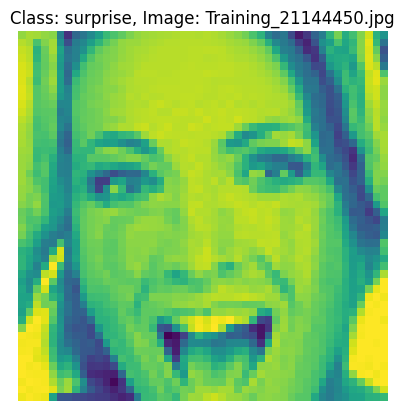

In [28]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to the training folder
test_dir = '/content/drive/MyDrive/Emotion_Activation_Figure/emotion_activationMap_dataset/test'

# Get a random class and a random image from that class
class_names = os.listdir(test_dir)  # Get the class names (folders)
random_class = random.choice(class_names)  # Randomly choose a class
random_image_name = random.choice(os.listdir(os.path.join(test_dir, random_class)))  # Randomly choose an image
image_path = os.path.join(test_dir, random_class, random_image_name)  # Path to the image

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f"Class: {random_class}, Image: {random_image_name}")
plt.axis('off')  # Hide axes
plt.show()

In [29]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for 7 emotions
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [30]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
352/352 [==============================] - 3114s 9s/step - loss: 1.2244 - accuracy: 0.4372 - val_loss: 1.0792 - val_accuracy: 0.5290
Epoch 2/10
352/352 [==============================] - 57s 163ms/step - loss: 1.0758 - accuracy: 0.5289 - val_loss: 1.0114 - val_accuracy: 0.5464
Epoch 3/10
352/352 [==============================] - 55s 157ms/step - loss: 1.0065 - accuracy: 0.5601 - val_loss: 0.9551 - val_accuracy: 0.5880
Epoch 4/10
352/352 [==============================] - 56s 158ms/step - loss: 0.9595 - accuracy: 0.5788 - val_loss: 0.9265 - val_accuracy: 0.5927
Epoch 5/10
352/352 [==============================] - 58s 164ms/step - loss: 0.9144 - accuracy: 0.6021 - val_loss: 0.8994 - val_accuracy: 0.6073
Epoch 6/10
352/352 [==============================] - 55s 158ms/step - loss: 0.8648 - accuracy: 0.6278 - val_loss: 0.8842 - val_accuracy: 0.6226
Epoch 7/10
352/352 [==============================] - 56s 159ms/step - loss: 0.8324 - accuracy: 0.6492 - val_loss: 0.8575 - val_acc

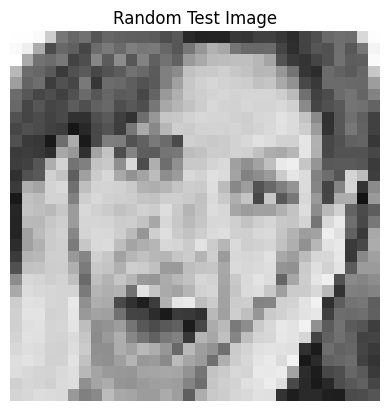

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get a batch of test images
test_images, test_labels = next(test_generator)

# Choose a random image from the batch
idx = random.randint(0, len(test_images) - 1)
img = test_images[idx]
label = test_labels[idx]

# Display the image
plt.imshow(img)
plt.title("Random Test Image")
plt.axis('off')
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(img_array, axis=0))
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Gradients of the output neuron (for predicted class) w.r.t. last conv layer
    grads = tape.gradient(class_channel, conv_outputs)

    # Mean intensity of the gradients per feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by its importance
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize between 0 and 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

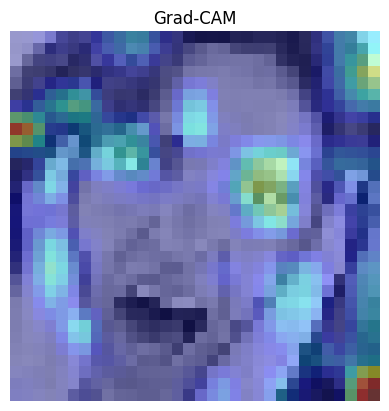

In [34]:
# Get the last convolutional layer name
model.summary()  #
last_conv_layer_name = "conv2d_1"

# Generate heatmap
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap superimposed on image
def display_gradcam(img, heatmap, alpha=0.4):
    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert to RGB and apply colormap
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Convert image to BGR for OpenCV
    img_bgr = cv2.cvtColor(np.uint8(img * 255), cv2.COLOR_RGB2BGR)
    superimposed_img = cv2.addWeighted(heatmap_color, alpha, img_bgr, 1 - alpha, 0)

    # Convert back to RGB
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()

display_gradcam(img, heatmap)